- 이 파일 정보

제안 추가
이 데이터 세트는 다양한 플랫폼과 장르에 걸쳐 비디오 게임의 전 세계 판매에 대한 통찰력을 제공합니다.Vgsales  
순위: 글로벌 판매량을 기준으로 한 게임의 순위입니다. (Integer)  
이름: 게임의 이름입니다. (String)  
플랫폼: 게임이 출시된 플랫폼입니다. (String)  
연도: 게임이 출시된 연도입니다. (Integer)  
장르: 게임의 장르. (String)  
퍼블리셔: 게임의 퍼블리셔입니다. (String)  
NA_Sales: 북미 지역 게임 판매입니다. (Float)  
EU_Sales: 유럽에서의 게임 판매입니다. (Float)  
JP_Sales: 일본에서의 게임 판매입니다. (Float)  
Other_Sales: 다른 지역의 게임 판매입니다. (Float)  
Global_Sales: 전 세계 게임의 총 판매량입니다. (Float)  

## 글로벌 게임즈 (1981 ~ 2020년)
🚩  Na(북 아메리카), EU(유럽) jp(일본) others(다른나라들)에 대한 게임들의 판매 수익에 대해 분석하였습니다.

어떤 게임회사중에 저 나라에서 많이 판매되고 있는지,

어느플랫폼이(will) 어느쪽 (NA, EU, JP, Others)에서 많이 판매가 되는지

어떤 장르가 많이 팔리는지 분석하였습니다.

- 목적: 매출이 좋은 회사와 협업해서 큰 매출, 더나아가 영화 상영, 비디오 대여 및 판매시장을 제치고 영상 산업에서 가장 큰 매출 올리는 산업
	비디오게임에서 온라인화로 바꾸어 매출화  

In [1]:
import pandas as pd
import numpy as np
path = './datasets/vgsales.csv'


# parse_dates 날짜형식으로 되어있는 데이터를 datetime형식으로 바꿔주는 함수
vg_df = pd.read_csv(path)
display(vg_df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
vg_df['Year'] = vg_df['Year'].fillna(0).astype(int)

In [4]:
# 전처리
vg_df.duplicated().sum()

0

In [5]:
# 결측치
vg_df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [6]:
# 결측지 제거
vg_df["Publisher"].fillna("Unknown", inplace=True)
vg_df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
vg_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
# Year가 0보다 작은 것을 뻈습니다.
vg_df = vg_df[vg_df['Year'] >= 0]
vg_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
# year가 0인거 제거
idx = vg_df[vg_df['Year'] == 0].index
vg_df.drop(idx, inplace=True)

vg_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
vg_df['Year'].value_counts()

Year
2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: int64

In [11]:
import numpy as np

Q1 = vg_df.describe().T.loc['NA_Sales', '25%']
Q3 = vg_df.describe().T.loc['NA_Sales', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0


print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 0.6


In [12]:
import numpy as np

Q1 = vg_df.describe().T.loc['EU_Sales', '25%']
Q3 = vg_df.describe().T.loc['EU_Sales', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0


print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 0.275


In [13]:
import numpy as np

Q1 = vg_df.describe().T.loc['JP_Sales', '25%']
Q3 = vg_df.describe().T.loc['JP_Sales', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0


print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 0.1


In [14]:
import numpy as np

Q1 = vg_df.describe().T.loc['Other_Sales', '25%']
Q3 = vg_df.describe().T.loc['Other_Sales', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0


print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 0.1


In [15]:
import numpy as np

Q1 = vg_df.describe().T.loc['Global_Sales', '25%']
Q3 = vg_df.describe().T.loc['Global_Sales', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
upper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0


print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: 0 ~ 1.1099999999999999


In [16]:
pd.to_datetime(vg_df['Year']).dt.year

0        1970
1        1970
2        1970
3        1970
4        1970
         ... 
16593    1970
16594    1970
16595    1970
16596    1970
16597    1970
Name: Year, Length: 16327, dtype: int32

In [17]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [18]:
cs_rfm_df_mean_n = vg_df.groupby('Genre').mean('NA_Sales').reset_index()
display(cs_rfm_df_mean_n)

cs_rfm_df_max_n = vg_df.groupby('Genre').max('NA_Sales').reset_index()
display(cs_rfm_df_max_n)

cs_rfm_df_std_n = vg_df.groupby('Genre')['NA_Sales'].std().reset_index()
display(cs_rfm_df_std_n)

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,7988.464802,2007.909929,0.264925,0.158770,0.048773,0.056846,0.529628
1,Adventure,11542.369906,2008.130878,0.079984,0.049992,0.040760,0.013088,0.184013
2,Fighting,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.531160
3,Misc,8549.790643,2007.258480,0.235368,0.125041,0.062380,0.043287,0.466444
4,Platform,6889.267123,2003.820776,0.509121,0.229075,0.149144,0.058801,0.946518
5,Puzzle,9655.485114,2005.243433,0.213678,0.088494,0.099264,0.021839,0.424203
6,Racing,7924.856444,2004.840131,0.291134,0.192757,0.046175,0.062545,0.592798
7,Role-Playing,8060.372536,2007.055744,0.221958,0.127519,0.238131,0.040367,0.628035
8,Shooter,7331.832293,2005.918877,0.448643,0.242161,0.029782,0.079485,0.800468
9,Simulation,8588.631022,2006.567568,0.213608,0.133020,0.074665,0.036851,0.458472


,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,16592,2017,9.63,9.27,3.96,10.57,21.40
1,Adventure,16594,2016,6.16,2.79,2.69,0.83,11.18
2,Fighting,16566,2016,6.75,2.61,2.87,1.41,13.04
3,Misc,16545,2016,14.97,9.26,4.16,2.85,29.02
4,Platform,16600,2016,29.08,9.23,6.81,2.90,40.24
5,Puzzle,16599,2015,23.20,5.36,5.32,1.18,30.26
6,Racing,16598,2016,15.85,12.88,4.13,7.53,35.82
7,Role-Playing,16593,2017,11.27,8.89,10.22,1.74,31.37
8,Shooter,16597,2016,26.93,5.88,1.44,2.52,28.31
9,Simulation,16595,2020,9.07,11.00,5.33,2.75,24.76


,Genre,NA_Sales
0,Action,0.570351
1,Adventure,0.267695
2,Fighting,0.517297
3,Misc,0.694177
4,Platform,1.509844
5,Puzzle,1.067627
6,Racing,0.748778
7,Role-Playing,0.676272
8,Shooter,1.211770
9,Simulation,0.470676


In [19]:
cs_rfm_df_mean_e = vg_df.groupby('Genre').mean('EU_Sales').reset_index()
display(cs_rfm_df_mean_e)

cs_rfm_df_max_e = vg_df.groupby('Genre').max('EU_Sales').reset_index()
display(cs_rfm_df_max_e)

cs_rfm_df_std_e = vg_df.groupby('Genre')['EU_Sales'].std().reset_index()
display(cs_rfm_df_std_e)

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,7988.464802,2007.909929,0.264925,0.158770,0.048773,0.056846,0.529628
1,Adventure,11542.369906,2008.130878,0.079984,0.049992,0.040760,0.013088,0.184013
2,Fighting,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.531160
3,Misc,8549.790643,2007.258480,0.235368,0.125041,0.062380,0.043287,0.466444
4,Platform,6889.267123,2003.820776,0.509121,0.229075,0.149144,0.058801,0.946518
5,Puzzle,9655.485114,2005.243433,0.213678,0.088494,0.099264,0.021839,0.424203
6,Racing,7924.856444,2004.840131,0.291134,0.192757,0.046175,0.062545,0.592798
7,Role-Playing,8060.372536,2007.055744,0.221958,0.127519,0.238131,0.040367,0.628035
8,Shooter,7331.832293,2005.918877,0.448643,0.242161,0.029782,0.079485,0.800468
9,Simulation,8588.631022,2006.567568,0.213608,0.133020,0.074665,0.036851,0.458472


,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,16592,2017,9.63,9.27,3.96,10.57,21.40
1,Adventure,16594,2016,6.16,2.79,2.69,0.83,11.18
2,Fighting,16566,2016,6.75,2.61,2.87,1.41,13.04
3,Misc,16545,2016,14.97,9.26,4.16,2.85,29.02
4,Platform,16600,2016,29.08,9.23,6.81,2.90,40.24
5,Puzzle,16599,2015,23.20,5.36,5.32,1.18,30.26
6,Racing,16598,2016,15.85,12.88,4.13,7.53,35.82
7,Role-Playing,16593,2017,11.27,8.89,10.22,1.74,31.37
8,Shooter,16597,2016,26.93,5.88,1.44,2.52,28.31
9,Simulation,16595,2020,9.07,11.00,5.33,2.75,24.76


,Genre,EU_Sales
0,Action,0.410505
1,Adventure,0.177070
2,Fighting,0.252662
3,Misc,0.449928
4,Platform,0.591490
5,Puzzle,0.321469
6,Racing,0.586190
7,Role-Playing,0.491526
8,Shooter,0.553916
9,Simulation,0.518625


In [20]:
cs_rfm_df_mean_o = vg_df.groupby('Genre').mean('Other_Sales').reset_index()
display(cs_rfm_df_mean_e)

cs_rfm_df_max_o = vg_df.groupby('Genre').max('Other_Sales').reset_index()
display(cs_rfm_df_max_e)

cs_rfm_df_std_o = vg_df.groupby('Genre')['Other_Sales'].std().reset_index()
display(cs_rfm_df_std_e)

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,7988.464802,2007.909929,0.264925,0.158770,0.048773,0.056846,0.529628
1,Adventure,11542.369906,2008.130878,0.079984,0.049992,0.040760,0.013088,0.184013
2,Fighting,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.531160
3,Misc,8549.790643,2007.258480,0.235368,0.125041,0.062380,0.043287,0.466444
4,Platform,6889.267123,2003.820776,0.509121,0.229075,0.149144,0.058801,0.946518
5,Puzzle,9655.485114,2005.243433,0.213678,0.088494,0.099264,0.021839,0.424203
6,Racing,7924.856444,2004.840131,0.291134,0.192757,0.046175,0.062545,0.592798
7,Role-Playing,8060.372536,2007.055744,0.221958,0.127519,0.238131,0.040367,0.628035
8,Shooter,7331.832293,2005.918877,0.448643,0.242161,0.029782,0.079485,0.800468
9,Simulation,8588.631022,2006.567568,0.213608,0.133020,0.074665,0.036851,0.458472


,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,16592,2017,9.63,9.27,3.96,10.57,21.40
1,Adventure,16594,2016,6.16,2.79,2.69,0.83,11.18
2,Fighting,16566,2016,6.75,2.61,2.87,1.41,13.04
3,Misc,16545,2016,14.97,9.26,4.16,2.85,29.02
4,Platform,16600,2016,29.08,9.23,6.81,2.90,40.24
5,Puzzle,16599,2015,23.20,5.36,5.32,1.18,30.26
6,Racing,16598,2016,15.85,12.88,4.13,7.53,35.82
7,Role-Playing,16593,2017,11.27,8.89,10.22,1.74,31.37
8,Shooter,16597,2016,26.93,5.88,1.44,2.52,28.31
9,Simulation,16595,2020,9.07,11.00,5.33,2.75,24.76


,Genre,EU_Sales
0,Action,0.410505
1,Adventure,0.177070
2,Fighting,0.252662
3,Misc,0.449928
4,Platform,0.591490
5,Puzzle,0.321469
6,Racing,0.586190
7,Role-Playing,0.491526
8,Shooter,0.553916
9,Simulation,0.518625


In [21]:
cs_rfm_df_mean_j = vg_df.groupby('Genre').mean('JP_Sales').reset_index()
display(cs_rfm_df_mean_e)

cs_rfm_df_max_j = vg_df.groupby('Genre').max('JP_Sales').reset_index()
display(cs_rfm_df_max_e)

cs_rfm_df_std_j = vg_df.groupby('Genre')['JP_Sales'].std().reset_index()
display(cs_rfm_df_std_e)

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,7988.464802,2007.909929,0.264925,0.158770,0.048773,0.056846,0.529628
1,Adventure,11542.369906,2008.130878,0.079984,0.049992,0.040760,0.013088,0.184013
2,Fighting,7621.746411,2004.630383,0.264043,0.119617,0.104246,0.043289,0.531160
3,Misc,8549.790643,2007.258480,0.235368,0.125041,0.062380,0.043287,0.466444
4,Platform,6889.267123,2003.820776,0.509121,0.229075,0.149144,0.058801,0.946518
5,Puzzle,9655.485114,2005.243433,0.213678,0.088494,0.099264,0.021839,0.424203
6,Racing,7924.856444,2004.840131,0.291134,0.192757,0.046175,0.062545,0.592798
7,Role-Playing,8060.372536,2007.055744,0.221958,0.127519,0.238131,0.040367,0.628035
8,Shooter,7331.832293,2005.918877,0.448643,0.242161,0.029782,0.079485,0.800468
9,Simulation,8588.631022,2006.567568,0.213608,0.133020,0.074665,0.036851,0.458472


,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,16592,2017,9.63,9.27,3.96,10.57,21.40
1,Adventure,16594,2016,6.16,2.79,2.69,0.83,11.18
2,Fighting,16566,2016,6.75,2.61,2.87,1.41,13.04
3,Misc,16545,2016,14.97,9.26,4.16,2.85,29.02
4,Platform,16600,2016,29.08,9.23,6.81,2.90,40.24
5,Puzzle,16599,2015,23.20,5.36,5.32,1.18,30.26
6,Racing,16598,2016,15.85,12.88,4.13,7.53,35.82
7,Role-Playing,16593,2017,11.27,8.89,10.22,1.74,31.37
8,Shooter,16597,2016,26.93,5.88,1.44,2.52,28.31
9,Simulation,16595,2020,9.07,11.00,5.33,2.75,24.76


,Genre,EU_Sales
0,Action,0.410505
1,Adventure,0.177070
2,Fighting,0.252662
3,Misc,0.449928
4,Platform,0.591490
5,Puzzle,0.321469
6,Racing,0.586190
7,Role-Playing,0.491526
8,Shooter,0.553916
9,Simulation,0.518625


<Axes: title={'center': 'std'}, xlabel='Genre', ylabel='generosity'>

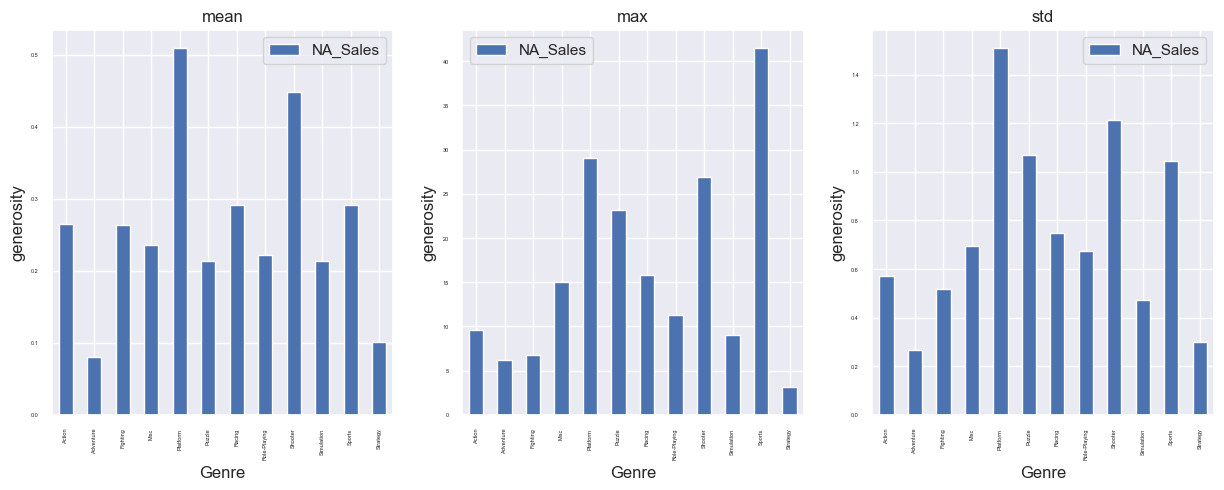

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 카타고리에 Technology 쪽이 가장 크게 지출 했다는 것을 볼 수 있다. 
# 두번쨰는 shoes
# 세번쨰는 clothing이다.
# 전체 global
# 전체 na 수익률 

cs_rfm_df_mean_n.plot(title='mean', x='Genre', y='NA_Sales', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="generosity")
cs_rfm_df_max_n.plot(title='max', x='Genre', y='NA_Sales', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="generosity")
cs_rfm_df_std_n.plot(title='std', x='Genre', y='NA_Sales', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="generosity")

### 장르 설명
- Action (액션)
- Adventure (어드벤쳐)
- Fighting (격투)
- Misc (카테고리 미분류)
- Platform (플랫폼)
- Puzzle ( 퍼즐)
- Racing (레이싱)
- Role-Playing (롤플레잉 - rpg)
- Shooter (슈팅)
- Simulation (시뮬레이션)
- Sports (스포츠)
- Strategy(전략)

<Axes: title={'center': 'std'}, xlabel='Genre', ylabel='generosity'>

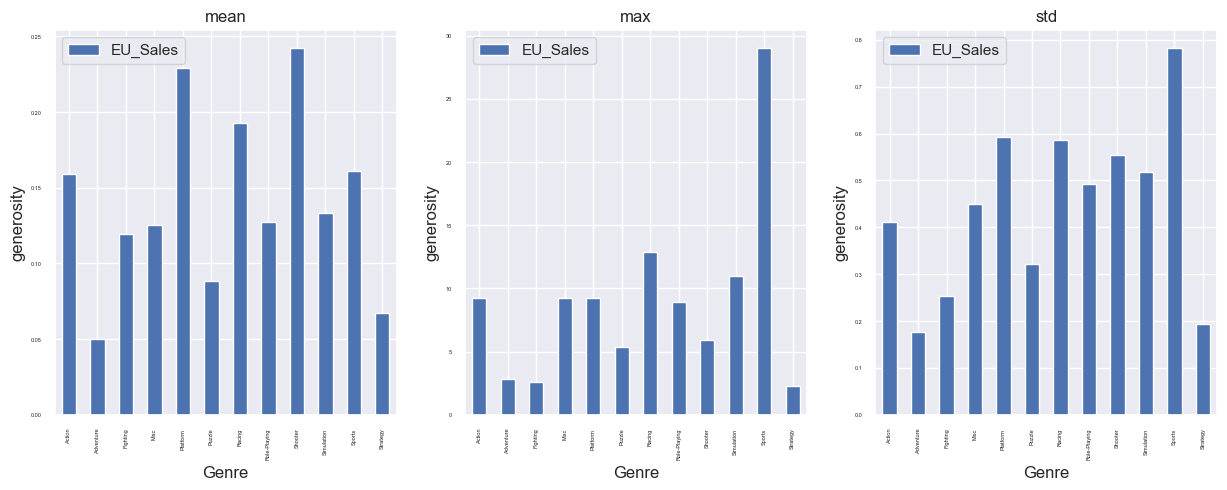

In [23]:
import matplotlib.pyplot as plt
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 카타고리에 Technology 쪽이 가장 크게 지출 했다는 것을 볼 수 있다. 
# 두번쨰는 shoes
# 세번쨰는 clothing이다.

cs_rfm_df_mean_e.plot(title='mean', x='Genre', y='EU_Sales', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="generosity")
cs_rfm_df_max_e.plot(title='max', x='Genre', y='EU_Sales', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="generosity")
cs_rfm_df_std_e.plot(title='std', x='Genre', y='EU_Sales', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="generosity")

<Axes: title={'center': 'std'}, xlabel='Genre', ylabel='generosity'>

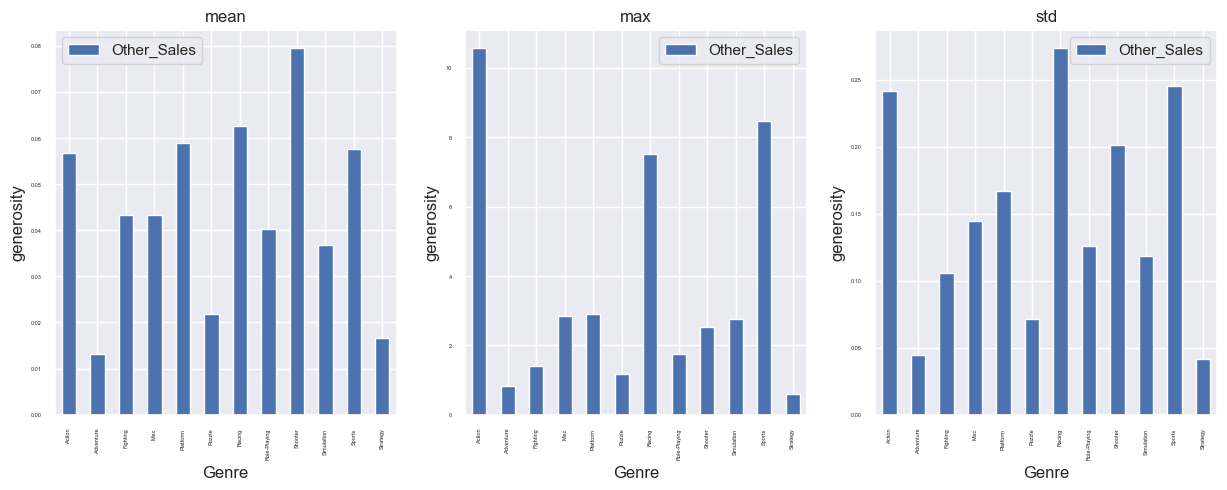

In [24]:
import matplotlib.pyplot as plt
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 카타고리에 Technology 쪽이 가장 크게 지출 했다는 것을 볼 수 있다. 
# 두번쨰는 shoes
# 세번쨰는 clothing이다.

cs_rfm_df_mean_o.plot(title='mean', x='Genre', y='Other_Sales', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="generosity")
cs_rfm_df_max_o.plot(title='max', x='Genre', y='Other_Sales', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="generosity")
cs_rfm_df_std_o.plot(title='std', x='Genre', y='Other_Sales', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="generosity")

<Axes: title={'center': 'std'}, xlabel='Genre', ylabel='generosity'>

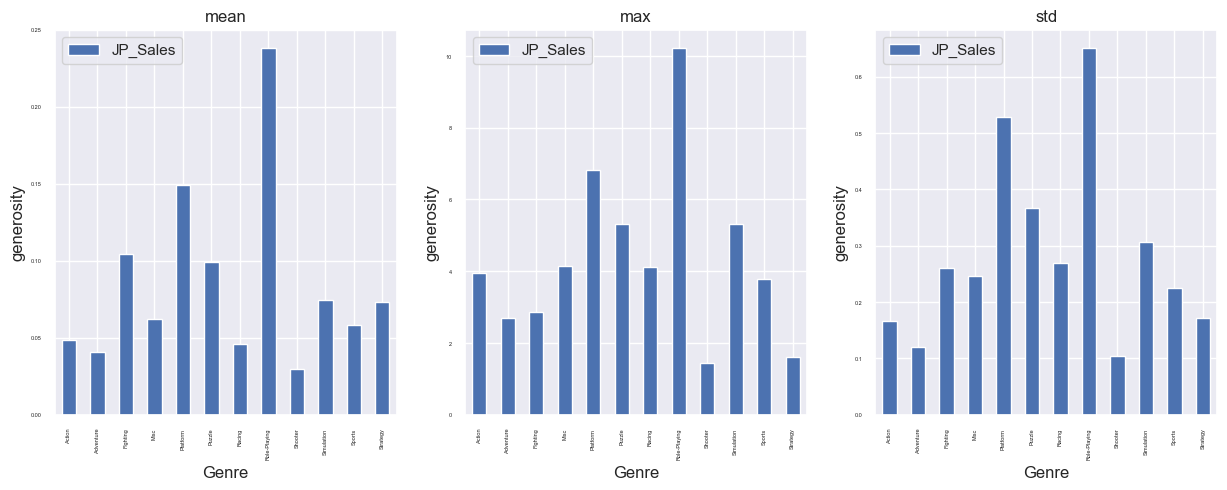

In [25]:
import matplotlib.pyplot as plt
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 카타고리에 Technology 쪽이 가장 크게 지출 했다는 것을 볼 수 있다. 
# 두번쨰는 shoes
# 세번쨰는 clothing이다.

cs_rfm_df_mean_j.plot(title='mean', x='Genre', y='JP_Sales', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="generosity")
cs_rfm_df_max_j.plot(title='max', x='Genre', y='JP_Sales', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="generosity")
cs_rfm_df_std_j.plot(title='std', x='Genre', y='JP_Sales', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="generosity")

In [26]:
# pd.set_option('display.max_rows', None)
vg_df['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

## 일본은 왜 role-playing이 다른 나라들 보다 높을까? 이유
- 자연스레 일본의 RPG는 자신만의 이야기보단, 정해진 스토리 속에서 연출과 스토리를 즐기는 구조로 흘러갔다. 당시 거품 경제가 정점에 달했던 시기이기에 일본이 독자적인 규격을 가진 PC를 만들고 사용해 왔다는 점도 영향을 끼쳤을 것이다.
- 일본에서 RPG를 조금 더 대중적인 영역으로 끌어올리고 수많은 JRPG에 영향을 준 <드래곤 퀘스트>의 특징도 영향이 있었을 것이다.

<img src="./images/dragon.jpeg" width="900px" style="margin-left: 10px">

In [39]:
# 너무 많아 탑 8개 회사를 조사였습니다.

top_publisher = ['Electronic Arts','Activision', 'Namco Bandai Games', 'Ubisoft','Konami Digital Entertainment', 'THQ', 'Nintendo' ,'Sony Computer Entertainment']
# vg_df.loc[~vg_df['Publisher'].isin(top_publisher), 'Publisher'] = 'Others'
vg_df = vg_df[vg_df['Publisher'] != 'Others']

### 어느플랫폼이 어느쪽 (NA, EU, JP, Others)에서 많이 판매가 되는지

### 회사설명
#### Electronic Arts(EA Games)
- 미국회사, 캘리포니아 북부 레드우드 시티에 본사가 위치하고 있으며, 인터넷 연결 콘솔, 모바일 기기, PC용 게임, 콘텐츠, 온라인 서비스를 개발하고 제공하는 회사입니다.
- 주요작품  
    - fifa시리즈
    - 배틀필드 시리즈  

<img src="./images/EA.png" width="900px" style="margin-left: 10px">

#### Activisition
- 미국회사, 1979년 미국 캘리포니아주에서 설립된 비디오 게임 개발회사다. 1979년 10월 1일 설립되었다 
- 지금은 MS가 92조에 인수하였다.
- 주요작품  
    - 콜 오브 듀티 시리즈
    - 둠 시리즈    

<img src="./images/Activision.png" width="900px" style="margin-left: 10px">

#### Ubisoft
- 프랑스 회사이며, 몽트뢰유에 본사를 둔 컴퓨터 비디오 게임 발행사이자 개발사이다.
- 주요작품
  - 페르시아 왕자  
  - 어썌신 크리드 시리즈  
  - 파크라이 시리즈  

<img src="./images/ubisoft.png" width="900px" style="margin-left: 10px">

#### Nemco Bandai Games
- 아케이드 게임이나 비디오 게임 등, 게임 소프트의 제작 및 개발을 하는 일본의 기업이다
- 주요작품  
    - 슈퍼마리오 마리오 브라더스
    - 철권 시리즈

<img src="./images/bandai.png" width="900px" style="margin-left: 10px">

#### Konami Digital Entertainment
- 비디오 게임과 캐릭터 상품의 개발, 판매 및 서적의 출판 등을 하는 일본의 기업이다.
- 주요 작품
    - 메탈기어 솔리드 시리즈
    - 위닝 일레븐 시리즈
 
<img src="./images/konami.png" width="900px" style="margin-left: 10px">

#### THQ
- 사라진 미국의 비디오 게임회사였다. LJN이 전신이며, 2010년 기준으로 종업원이 2,000명 이상으로 구성된 세계 게임회사 종업원 수 5위권에 들었던 회사였다.
- 현재 THQ는 노르딕에 매각되어 THQ 노르딕으로 회사가 운영되고 있다
- 주요 작품
  - 스타워즈 시리즈
  - State of Decay 시리즈
  - Ori and the Blind Forest

<img src="./images/thq.png" width="900px" style="margin-left: 10px">
  
#### Nintendo
- 교토에 본사가 위치한 일본의 다국적 비디오 게임 기업이다. 비디오 게임기와 비디오 게임을 제작하고 출시한다
- 주요 작품
    - 마리오 시리즈
    - 동키콩
    - 젤다의 전설

<img src="./images/nintendo.png" width="700px" style="margin-left: 10px">

#### Sony Interactive Entertainment
- 소니그룹의 자회사로 가정용 게임기와 게임 소프트웨어의 개발, 판매를 하는 게임 개발사이다.
- 주요작품
    - 갓 오브 워 시리즈
    - 라스트 오브 어스 시리즈
 
<img src="./images/sony.jpeg" width="900px" style="margin-left: 10px">

## 시각화

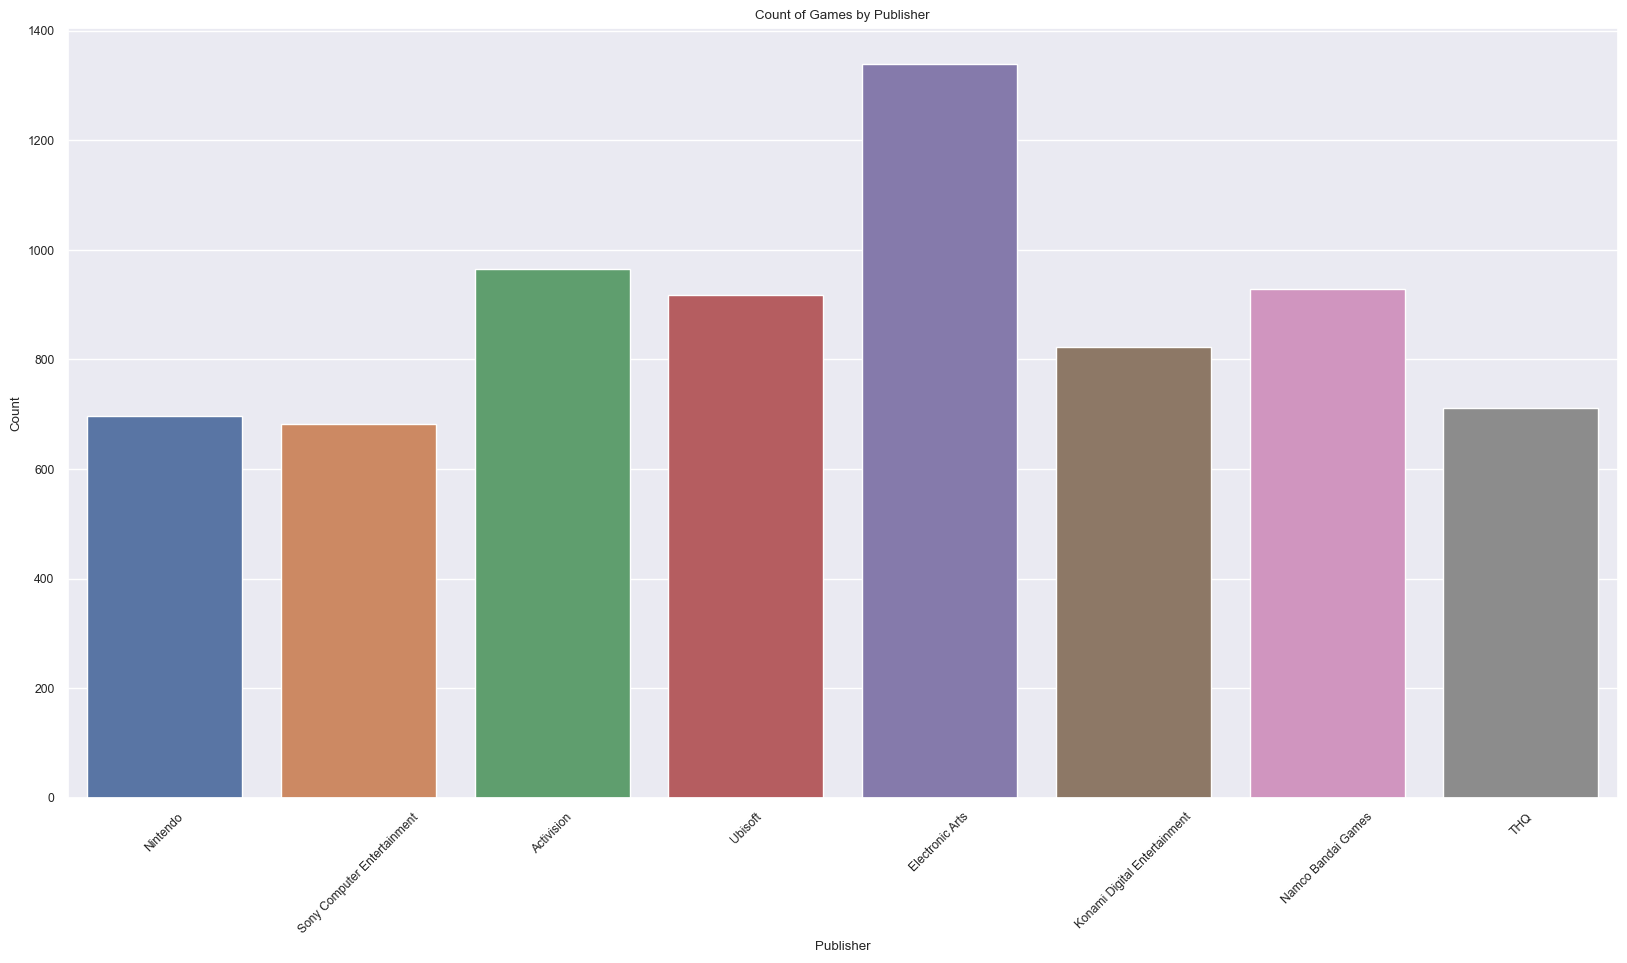

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# top 8개 pushlier로 분석하였습니다.

# 전체 구매 목록 그래프
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 10))
sns.countplot(x='Publisher', data=vg_df)
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.title('Count of Games by Publisher')
plt.xticks(rotation=45)
plt.show()

In [29]:
vg_df['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

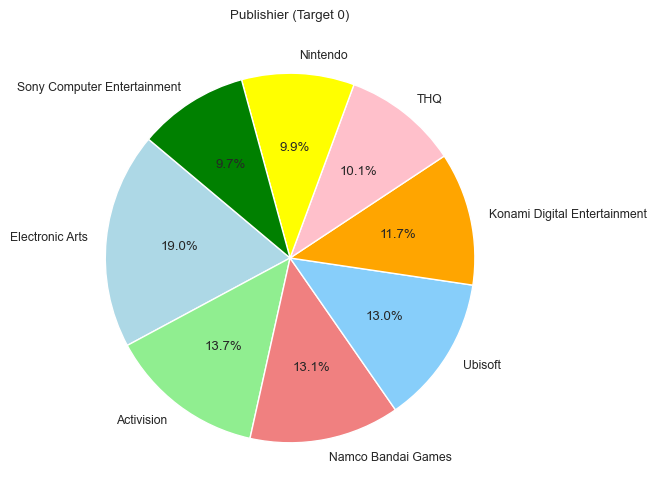

In [41]:
import matplotlib.pyplot as plt
labels = ['Electronic Arts','Activision', 'Namco Bandai Games', 'Ubisoft','Konami Digital Entertainment', 'THQ', 'Nintendo' ,'Sony Computer Entertainment']
sizes_target0 = [1339, 966, 928, 918, 823, 712, 696, 682]  # 심장마비 발생률 x
fig, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.pie(sizes_target0, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue' , 'orange', 'pink', 'yellow', 'green'])
axes.set_title('Publishier (Target 0)')
plt.show()


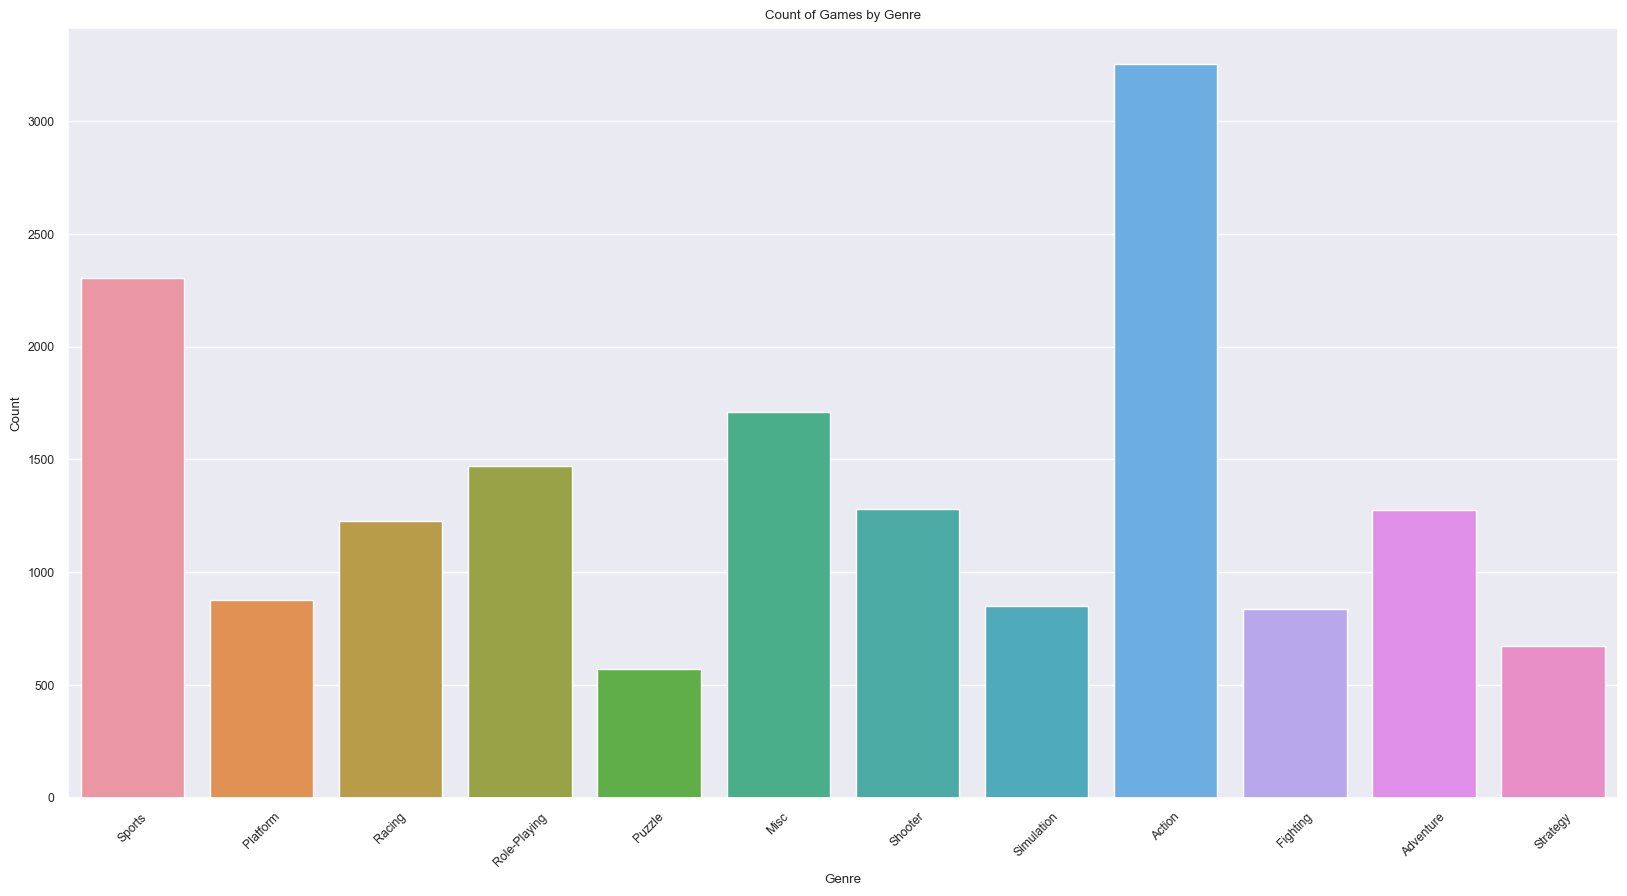

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 구매 목록 그래프
sns.set(font_scale=0.8)
plt.figure(figsize=(20, 10))
sns.countplot(x='Genre', data=vg_df)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Games by Genre')
plt.xticks(rotation=45)
plt.show()

### 장르

- action쪽 가장 많은 매출로 보아 action으로 중심하는 하는 회사들(activision, EA games, ubisoft, konami) 같은 회사들이 매출을 많이 얻었었습니다.
- 또한 Sports도 여전히 많은 것이기 sports게임을 주요 하는 회사 EA Games가 축구나, 하키로 가장 많이 매출을 얻었었습니다.
- Misc도 평균적으로 비교적 비슷한 매출 수준을 보이고 있지만 일부 차이가 있을 수가있습니다.
- shooter 게임도 misc 보다는 적은 매출이지만 비슷한 매출 수준을 보이고 있습니다.
- racing 게임도 위에 다른 게임 카테고리보다는 적지만 여전히 비슷한 매출 수준을 보이고 있습니다.
- platform, role-playing, simulation 쪽 카테고리도 racing보다는 적지만 비슷한 매출 수준을 보이고 있습니다.
- figiting, advanture, strategy(전략) 카테고리도 여전히 위에 카테고리들 보다는 매출이 적지만 비슷한 수준의 매출성향을 보이고 있습니다.
- 가장 낮은 매출을 기록하고 있는 puzzle은 매출이 다른 카테고리들 보다는 적지만 여전히 매출 성향을 보이고 있어서 기대될 수 있습니다.

📌 요약하자면, 인기 있는 IP 보유, 게임 다양성, 글로벌 시장 점령, 기술력과 제작 퀄리티가 높은 회사들이 매출과 수익률이 많이 높은것을 볼 수 있습니다.

In [32]:
vg_df.loc[:, 'Year'] = pd.to_datetime(vg_df['Year'], format='%Y')

In [33]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16327 non-null  int64         
 1   Name          16327 non-null  object        
 2   Platform      16327 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16327 non-null  object        
 5   Publisher     16327 non-null  object        
 6   NA_Sales      16327 non-null  float64       
 7   EU_Sales      16327 non-null  float64       
 8   JP_Sales      16327 non-null  float64       
 9   Other_Sales   16327 non-null  float64       
 10  Global_Sales  16327 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


/Users/wmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wmoon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

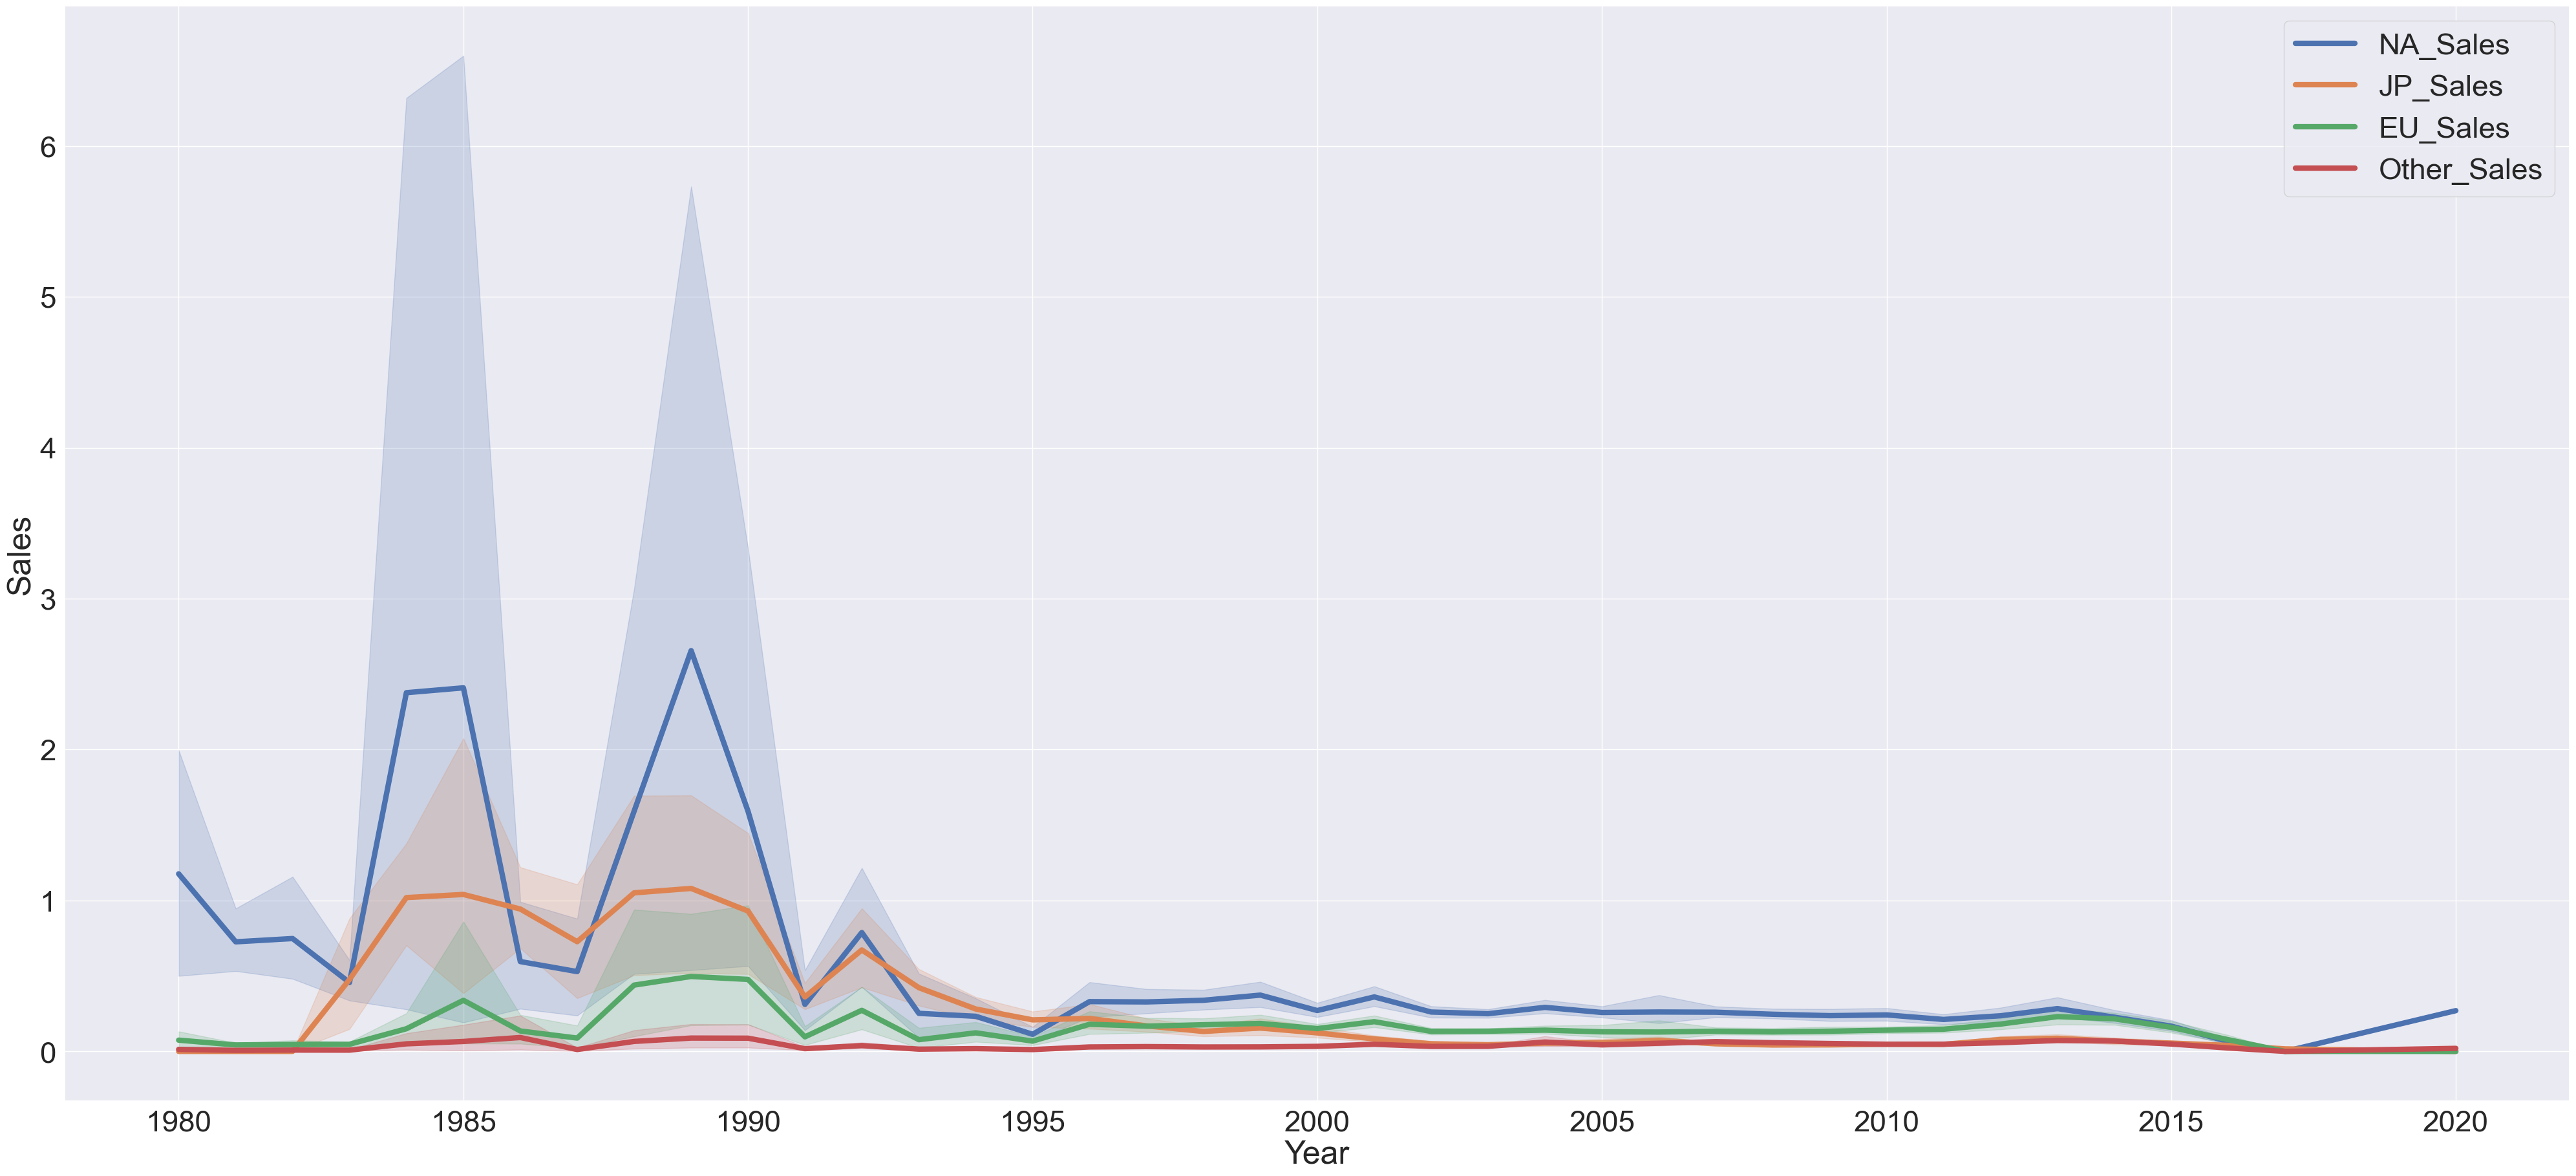

In [34]:
# 어느플랫폼이(will) 어느쪽 (NA, EU, JP, Others)에서 많이 판매가 되는지 - 데이터 수집
import matplotlib.pyplot as plt
import seaborn as sns
# 축 글자 폰트 사이즈
sns.set(font_scale=3)
fig, axes = plt.subplots(1, 1, figsize=(50, 22))


sns.lineplot(x='Year', y='NA_Sales', label='NA_Sales', linewidth=6, data=vg_df)
sns.lineplot(x='Year', y='JP_Sales',label='JP_Sales', linewidth=6, data=vg_df)
sns.lineplot(x='Year', y='EU_Sales', label='EU_Sales', linewidth=6, data=vg_df)
sns.lineplot(x='Year', y='Other_Sales', label='Other_Sales', linewidth=6, data=vg_df)


plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

## 날짜별로 수입
- 1981~ 1990년도에 수익이 많은 이유가 있었었습니다.

- 기술의 발전이 있었습니다. 1981년대 이후 컴퓨터 기술의 발전이 급격하게 진행되었습니다. 특히 1970년대 이후로는 개인용 컴퓨터(PC)의 보급과 함께 게임 산업도 발전하였습니다. 그리고 1990년대에는 인터넷의 보급으로 온라인 게임이 부상하였습니다.

- 시장의 확대도 있었습니다. 게임이 전문적인 산업으로서 성장함에 따라 시장도 확대되었습니다. 1990년대에는 콘솔 게임기(PlayStation, Nintendo 등)와 PC 게임, 그리고 휴대용 게임기(Game Boy 등) 등 다양한 플랫폼이 등장하여 시장을 더욱 다각화시켰습니

- 소비자들의 관심 증가하였습니다 특히 1990년대에는 게임이 일반인들에게 더욱 인기를 끌었습니다. 게임은 더욱 다양한 연령층과 성별의 사람들에게 접근할 수 있는 매체로 자리잡았으며, 특히 신기술의 도입과 함께 그래픽과 사운드 등의 품질이 향상되면서 게임에 대한 관심이 더욱 높아졌습니다.

- 1988년대에는 게임 산업에서의 마케팅과 퍼블리싱도 발전하였습니다. 특히 새로운 게임이 출시될 때마다 홍보를 위한 이벤트나 광고가 많이 이루어졌으며, 이는 소비자들의 관심을 끌고 게임 시장을 활성화시켰습니다.시켰습니다.

  이러한 요인들이 결합하여 1981~ 1990 년대에는 게임 산업의 수익이 높아졌습니다. 게임 산업은 이후도 지속적으로 성장하여 현재에 이르러도 큰 산업군 중 하나로 발전하고 있습니다.

In [35]:
vg_df['Publisher'].value_counts()

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

In [36]:
pd.set_option('display.max_rows', None)
vg_df['Platform'].value_counts()

Platform
DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64